In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the data set
df=pd.read_csv("https://raw.githubusercontent.com/jif245/PUI2017_jif245/master/HW8_jif245/seven-major-felony-offenses-by-precinct-2000-2016.csv")

In [3]:
#only the first row of the precinct has the precinct number, we fill the rows that don't have this values.
df.PCT.fillna(method='ffill',inplace=True)

In [4]:
#let's visualize the table
df.head(8)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1.0,MURDER & NON NEGL. MANSLAUGHTER ...,3.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0,0,1,0
1,1.0,RAPE,12.0,5.0,10.0,11.0,11.0,5.0,4.0,7.0,12.0,4.0,6.0,13.0,10.0,12,8,7,9
2,1.0,ROBBERY,252.0,188.0,210.0,164.0,154.0,172.0,119.0,128.0,108.0,106.0,96.0,102.0,81.0,68,50,79,60
3,1.0,FELONY ASSAULT,139.0,164.0,147.0,134.0,129.0,121.0,94.0,90.0,83.0,83.0,68.0,94.0,110.0,87,76,86,78
4,1.0,BURGLARY,475.0,437.0,297.0,403.0,246.0,293.0,255.0,231.0,189.0,207.0,170.0,155.0,188.0,171,145,138,117
5,1.0,GRAND LARCENY,2358.0,2117.0,1896.0,1803.0,1708.0,1624.0,1462.0,1395.0,1258.0,1122.0,1065.0,979.0,985.0,1051,896,1114,1081
6,1.0,GRAND LARCENY OF MOTOR VEHICLE ...,199.0,157.0,153.0,132.0,133.0,90.0,78.0,63.0,57.0,54.0,38.0,59.0,41.0,27,33,21,50
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,1708.0,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395


In [5]:
#checking there are not missing values 
df.CRIME.unique()

array(['MURDER & NON NEGL. MANSLAUGHTER                                ',
       'RAPE                                  ',
       'ROBBERY                               ',
       'FELONY ASSAULT                        ',
       'BURGLARY                              ',
       'GRAND LARCENY                         ',
       'GRAND LARCENY OF MOTOR VEHICLE                                  ',
       'TOTAL SEVEN MAJOR FELONY OFFENSES'], dtype=object)

In [6]:
#stripping spaces from the names of the crimes
df.CRIME=df.CRIME.str.strip()

In [7]:
#checking the new names without spaces.
df.CRIME.unique()

array(['MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY',
       'FELONY ASSAULT', 'BURGLARY', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE',
       'TOTAL SEVEN MAJOR FELONY OFFENSES'], dtype=object)

In [8]:
#we are dropping the mayor crimes values, except for the sum of all 7 of them
df=df[df.CRIME=="TOTAL SEVEN MAJOR FELONY OFFENSES"]

Since the table is ordered in a way but in a way in which is friendly for python (it's not friendly for what I know of python) we have to change how the columns and indexes are oriented. 

In [9]:
df_tot=df.sum(axis=0)

In [10]:
df_tot=df_tot.drop("PCT",axis=0)

In [11]:
df_tot=pd.DataFrame(df_tot)

In [12]:
df_tot=df_tot.reset_index()
df_tot = df_tot.iloc[1:]
df_tot.columns=["Year","Crime"]

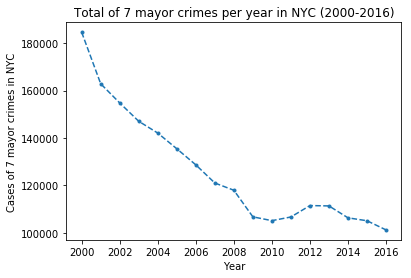

In [13]:
plot(df_tot.Year,df_tot.Crime,".--")
title("Total of 7 mayor crimes per year in NYC (2000-2016)")
xlabel("Year")
ylabel("Cases of 7 mayor crimes in NYC")

In [14]:
df.head()

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,1708.0,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395
15,5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,1029.0,975.0,969.0,962.0,1001.0,980,870,917,899
23,6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,1738.0,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388
31,7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,807.0,702.0,702.0,704.0,762.0,711,732,781,823
39,9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,1495.0,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463


In [15]:
#The original data has precicnts, not boroughs, with this function we assign the borough depending on the precinct number
def borougize(x):
    if(x>=1 and x<=34):
        return "Manhattan"
    if(x>=40 and x<=52):
        return "Bronx"
    if(x>=60 and x<=94):
        return "Brooklyn"
    if(x>=100 and x<=115):
        return "Queens"
    if(x>=120 and x<=123):
        return "Staten Island"

In [16]:
#Applying function
df.PCT=df.PCT.map(borougize)

In [17]:
#Checking there are not missing values
df.PCT.value_counts()

Brooklyn         23
Manhattan        22
Queens           16
Bronx            12
Staten Island     4
Name: PCT, dtype: int64

In [18]:
#We group by borough name and sum the values for each precinct of each borough
#then we reset the new index because the group by is not a real table.then we show the columns
df_b=df.groupby(df['PCT']).sum()
df_b=df_b.reset_index()
df_b.columns

Index([u'PCT', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006',
       u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014',
       u'2015', u'2016'],
      dtype='object')

In [19]:
#With the new selection, we need to change the column names to make it more consisten with the data. 
df_b.rename(columns={'PCT':'Borough'}, inplace=True)
df_b.head()

,Borough,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Bronx,31557.0,27176.0,26300.0,25167.0,24585.0,23634.0,22485.0,21743.0,21172.0,19741.0,19650.0,19975.0,20312.0,20699,19870,20812,20836
1,Brooklyn,56539.0,49734.0,47586.0,45618.0,43354.0,41931.0,39738.0,37074.0,36398.0,32585.0,32730.0,33880.0,35889.0,35619,34328,32542,29667
2,Manhattan,48941.0,43418.0,40704.0,40018.0,39234.0,36795.0,34740.0,32392.0,31256.0,28111.0,26847.0,26104.0,27397.0,27527,25955,26823,26612
3,Queens,42940.0,38584.0,36402.0,32809.0,31315.0,29449.0,28319.0,26339.0,25666.0,23295.0,22962.0,23660.0,24513.0,24084,22914,21662,20988
4,Staten Island,4675.0,3996.0,3817.0,3457.0,3605.0,3666.0,3400.0,3461.0,3464.0,2998.0,2926.0,3050.0,3377.0,3406,3242,3235,3104


In [20]:
Bronx=df_b[df_b["Borough"]=="Bronx"].T.iloc[1:].reset_index()
Brooklyn=df_b[df_b["Borough"]=="Brooklyn"].T.iloc[1:].reset_index()
Manhattan=df_b[df_b["Borough"]=="Manhattan"].T.iloc[1:].reset_index()
Queens=df_b[df_b["Borough"]=="Queens"].T.iloc[1:].reset_index()
Staten_Island=df_b[df_b["Borough"]=="Staten Island"].T.iloc[1:].reset_index()


In [21]:
Bronx.columns=["Year","Crime"]
Brooklyn.columns=["Year","Crime"]
Manhattan.columns=["Year","Crime"]
Queens.columns=["Year","Crime"]
Staten_Island.columns=["Year","Crime"]


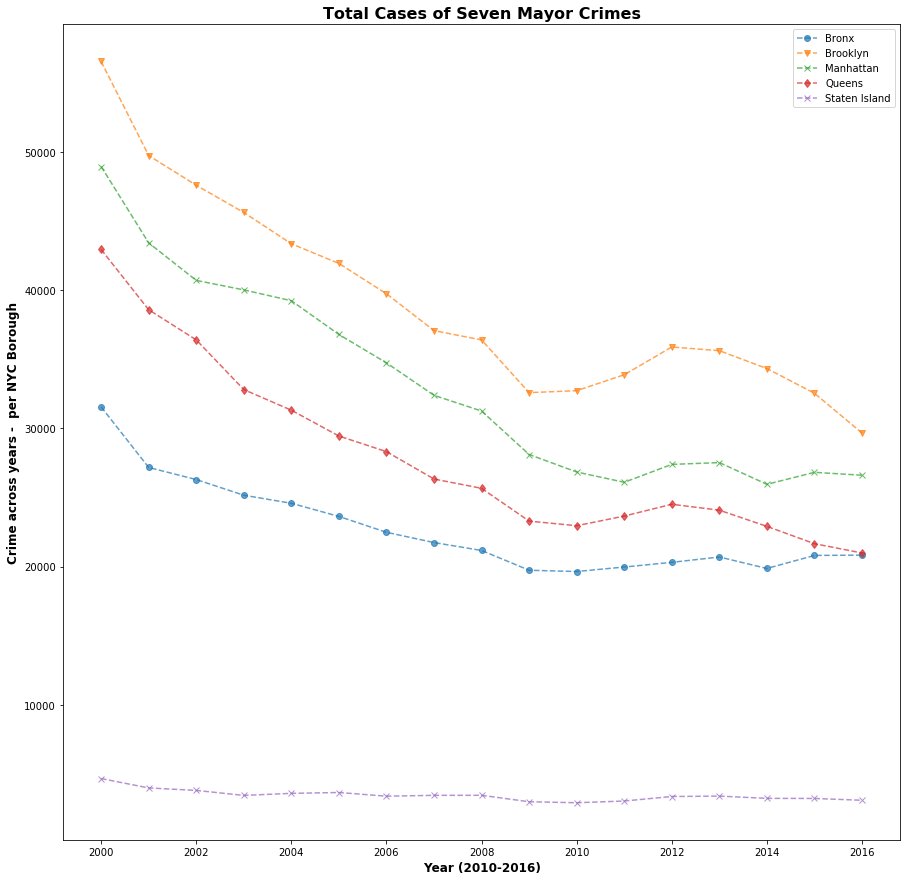

In [22]:
plt.figure(figsize=(15,15))
plt.plot(Bronx.Year,Bronx.Crime,"--o",label="Bronx",alpha=0.7)
plt.plot(Brooklyn.Year,Brooklyn.Crime,"--v",label="Brooklyn",alpha=0.7)
plt.plot(Manhattan.Year,Manhattan.Crime,"--x",label="Manhattan",alpha=0.7)
plt.plot(Queens.Year,Queens.Crime,"--d",label="Queens",alpha=0.7)
plt.plot(Staten_Island.Year,Staten_Island.Crime,"--x",label="Staten Island",alpha=0.7)
plt.title("Crime across years - Absolute ")
plt.xlabel("Year (2010-2016)",size=12,weight="semibold")
plt.title("Total Cases of Seven Mayor Crimes",size=16,weight="semibold")
plt.ylabel("Crime across years -  per NYC Borough",weight="semibold",size=12)
plt.savefig('absolute_crime.png')
plt.legend()
plt.show()


In [23]:
Brooklyn.Crime.max()

56539.0

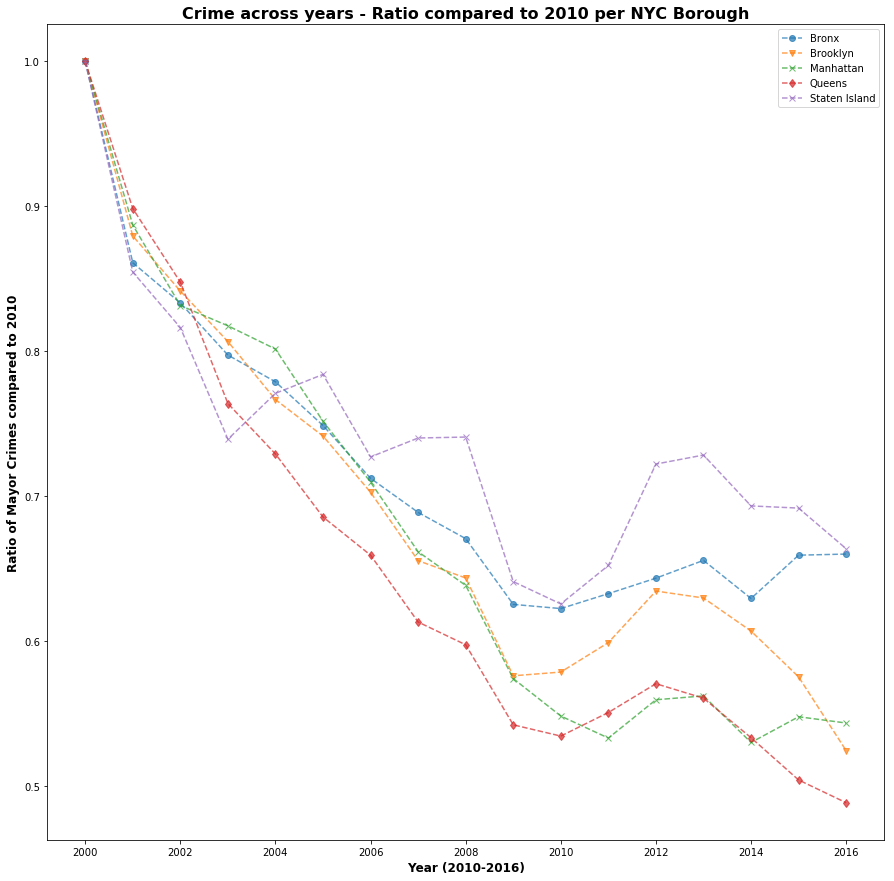

In [24]:
plt.figure(figsize=(15,15))
plt.plot(Bronx.Year,Bronx.Crime/Bronx.Crime.max(),"--o",label="Bronx",alpha=0.7)
plt.plot(Brooklyn.Year,Brooklyn.Crime/Brooklyn.Crime.max(),"--v",label="Brooklyn",alpha=0.7)
plt.plot(Manhattan.Year,Manhattan.Crime/Manhattan.Crime.max(),"--x",label="Manhattan",alpha=0.7)
plt.plot(Queens.Year,Queens.Crime/Queens.Crime.max(),"--d",label="Queens",alpha=0.7)
plt.plot(Staten_Island.Year,Staten_Island.Crime/Staten_Island.Crime.max(),"--x",label="Staten Island",alpha=0.7)
plt.legend()
plt.xlabel("Year (2010-2016)",size=12,weight="semibold")
plt.ylabel("Ratio of Mayor Crimes compared to 2010",size=12,weight="semibold")
plt.title("Crime across years - Ratio compared to 2010 per NYC Borough",weight="bold",size=16)
plt.savefig('ratio_crime.png')
plt.show()
